### **Exercice 1** : Introduction to Time Series and Decomposition

#### What is a Time Series?

A time series is an ordered sequence of data points measured at successive points in time. It is commonly used in domains like finance, healthcare, and climate science.

Key components of a time series:
- **Trend**: Overall direction of the data over a long period.
- **Seasonality**: Regular and repeating patterns over a fixed period.
- **Residual/Noise**: Random fluctuations that cannot be explained by trend or seasonality.


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#### Dataset: Air Passengers
This dataset contains monthly totals of a US airline's passengers from 1949 to 1960.

We will download the dataset and take a quick look at its structure.


In [ ]:
# Load the Air Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Display the first few rows
data.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Plotting the Time Series

Visualization is essential for understanding the data. Let's plot the time series to observe its overall behavior.


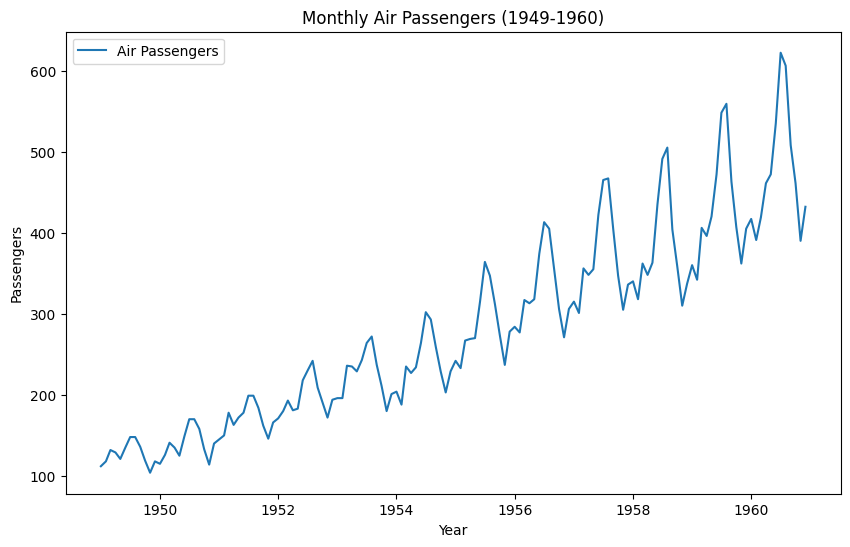

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Air Passengers')
plt.title('Monthly Air Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()


#### Decomposing Time Series into Components

We will break down the time series into its components: trend, seasonality, and residuals. This helps us understand the underlying patterns.


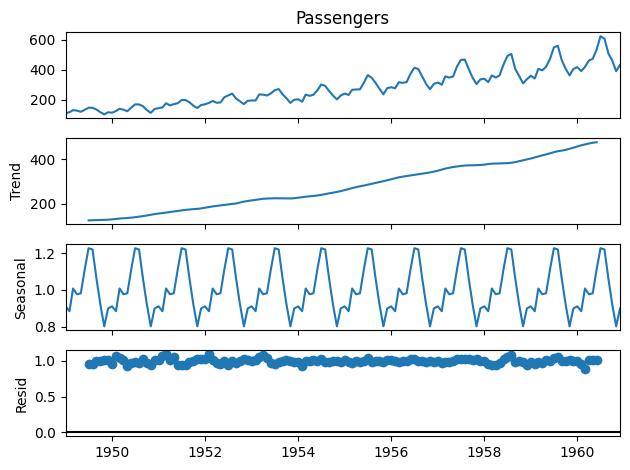

In [ ]:
# Perform decomposition
result = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)

# Plot the components
result.plot()
plt.show()


#### Observing the Components

- **Trend**: Shows a long-term increase in air passengers over time.
- **Seasonality**: Highlights regular, repeating patterns each year.
- **Residuals**: Reflects random variations that are not explained by the trend or seasonality.


### **Exercice 2** : Z-Normalization and Similarity Measurement

#### What is Z-Normalization?

Z-Normalization standardizes a time series by transforming it to have a mean of 0 and a standard deviation of 1.

This helps remove differences in scale and offset, allowing for fair comparison between time series.

The formula for Z-Normalization is:
$$[
z_i = \frac{x_i - \mu}{\sigma}
]$$
where:
- $(x_i)$: Original data point
- $(\mu)$: Mean of the time series
- $(\sigma)$: Standard deviation of the time series


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Dataset: Synthetic Time Series
For this exercise, we will generate two synthetic time series to illustrate Z-Normalization and compare their similarity.


In [ ]:
# Generate two synthetic time series
np.random.seed(42)
time = np.linspace(0, 1, 100)
series1 = 10 + 5 * np.sin(2 * np.pi * 3 * time) + np.random.normal(0, 0.5, 100)
series2 = 15 + 7 * np.sin(2 * np.pi * 3 * time + 0.5) + np.random.normal(0, 0.5, 100)

# Create a DataFrame
data = pd.DataFrame({'Time': time, 'Series1': series1, 'Series2': series2})

# Display the first few rows
data.head()


,Time,Series1,Series2
0,0.000000,10.248357,17.648293
1,0.010101,10.877124,19.247594
2,0.020202,12.182157,20.227377
3,0.030303,13.464719,20.743289
4,0.040404,13.333318,21.587402


#### Plotting the Original Time Series

Let's visualize the two time series before applying Z-Normalization to observe differences in scale and offset.


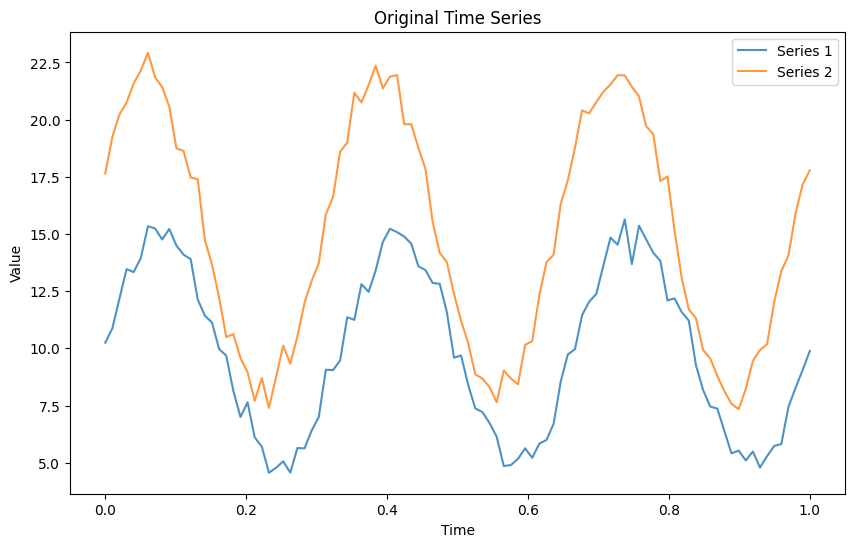

In [ ]:
# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Series1'], label='Series 1', alpha=0.8)
plt.plot(data['Time'], data['Series2'], label='Series 2', alpha=0.8)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


#### Applying Z-Normalization

We will standardize each time series to have a mean of 0 and a standard deviation of 1.


In [ ]:
# Z-Normalize the time series
data['Series1_Z'] = (data['Series1'] - data['Series1'].mean()) / data['Series1'].std()
data['Series2_Z'] = (data['Series2'] - data['Series2'].mean()) / data['Series2'].std()

# Display the first few rows
data[['Series1_Z', 'Series2_Z']].head()


,Series1_Z,Series2_Z
0,0.084296,0.523168
1,0.260805,0.844535
2,0.627159,1.041414
3,0.987204,1.145082
4,0.950317,1.314700


#### Plotting the Z-Normalized Time Series

Let's plot the normalized time series to observe how they are now comparable on the same scale.


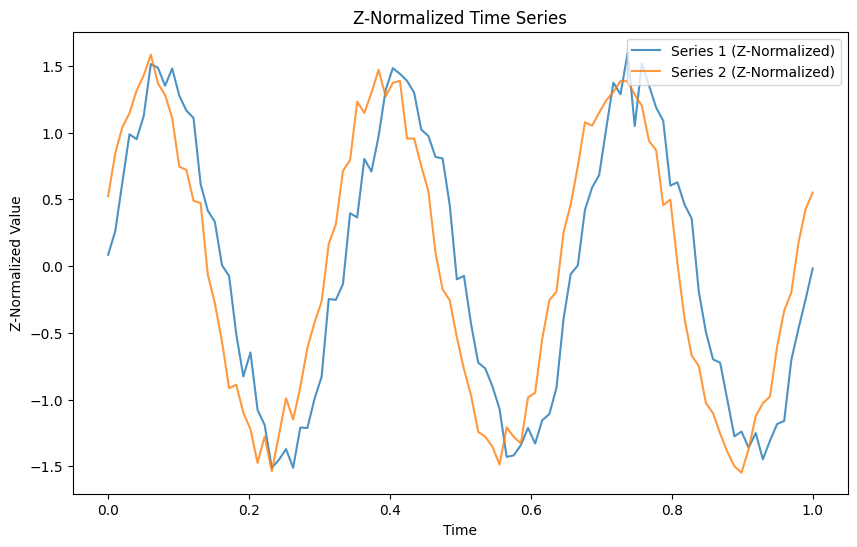

In [ ]:
# Plot the Z-Normalized time series
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Series1_Z'], label='Series 1 (Z-Normalized)', alpha=0.8)
plt.plot(data['Time'], data['Series2_Z'], label='Series 2 (Z-Normalized)', alpha=0.8)
plt.title('Z-Normalized Time Series')
plt.xlabel('Time')
plt.ylabel('Z-Normalized Value')
plt.legend()
plt.show()


#### Measuring Similarity Between Time Series

We will compute the Euclidean distance between the two normalized series to quantify their similarity.


In [ ]:
# Compute Euclidean distance
distance = np.sqrt(np.sum((data['Series1_Z'] - data['Series2_Z'])**2))
print(f"Euclidean Distance between Series 1 and Series 2 (Z-Normalized): {distance}")


Euclidean Distance between Series 1 and Series 2 (Z-Normalized): 4.9203846828353806


#### Observing the Results

- The Euclidean distance quantifies the dissimilarity between the two time series.
- After Z-Normalization, the values are comparable despite the original differences in scale and offset.


### **Exercice 3** : Time Series Forecasting with Moving Average

#### What is Time Series Forecasting?

Time series forecasting involves predicting future values based on past data.

One simple approach is the **Moving Average Model (MA)**, which predicts the next value as the average of past observations or errors, capturing short-term dependencies.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Dataset: Daily Minimum Temperatures in Melbourne

This dataset contains daily minimum temperatures in Melbourne, Australia, from 1981 to 1990. We will use it for forecasting.


In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows
data.head()


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


#### Plotting the Time Series

Let's visualize the temperature data to understand its trends and patterns.


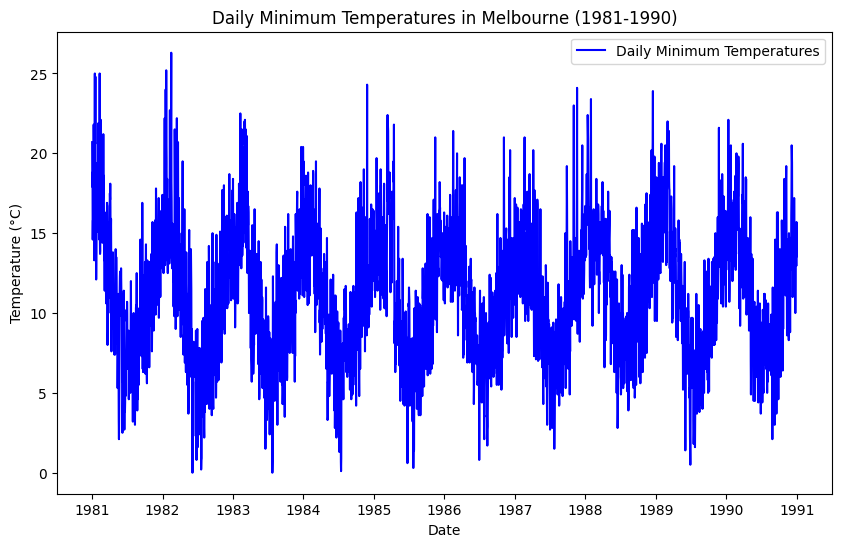

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Daily Minimum Temperatures', color='blue')
plt.title('Daily Minimum Temperatures in Melbourne (1981-1990)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


#### Simple Moving Average

The moving average smooths the time series by averaging a fixed number of past observations. This can help forecast short-term trends.


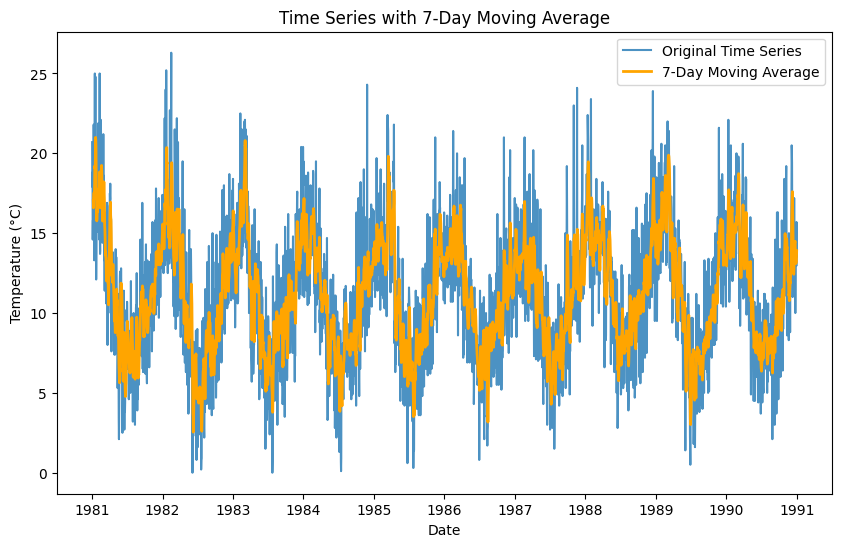

In [ ]:
# Apply a simple moving average with a window of 7 days
data['SMA_7'] = data['Temp'].rolling(window=7).mean()

# Plot the original time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Temp'], label='Original Time Series', alpha=0.8)
plt.plot(data['SMA_7'], label='7-Day Moving Average', color='orange', linewidth=2)
plt.title('Time Series with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


#### Forecasting with Moving Average

Using the moving average model, we will predict the temperature for the next day based on the average of the last 7 days.


In [ ]:
# Predict the next value using the mean of the last 7 days
forecast = data['Temp'].iloc[-7:].mean()
print(f"Forecast for the next day: {forecast:.2f}°C")


Forecast for the next day: 13.90°C


#### Evaluating the Moving Average Model

We will evaluate the forecasting accuracy by comparing the predicted values using the moving average model with the actual values from the last part of the time series.

The Mean Absolute Error (MAE) will be used as the evaluation metric:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$
where:
- $(y_i)$: Actual value  
- $(\hat{y}_i)$: Predicted value


In [ ]:
# Define the window size for the moving average
window_size = 7

# Create the forecast using a rolling mean for the last part of the series
data['SMA_Forecast'] = data['Temp'].rolling(window=window_size).mean()

# Use the last 30 days for evaluation
evaluation_period = 30
actual_values = data['Temp'].iloc[-evaluation_period:]
predicted_values = data['SMA_Forecast'].iloc[-evaluation_period:]

# Drop NaN values caused by the rolling mean
actual_values = actual_values.dropna()
predicted_values = predicted_values.dropna()

# Compute the Mean Absolute Error (MAE)
mae = abs(actual_values - predicted_values).mean()
print(f"Mean Absolute Error (MAE) over the last {evaluation_period} days: {mae:.2f}°C")


Mean Absolute Error (MAE) over the last 30 days: 1.97°C


#### Visualizing Forecast vs Actual Values

Let's plot the actual and predicted values for the last 30 days to assess the model's performance visually.


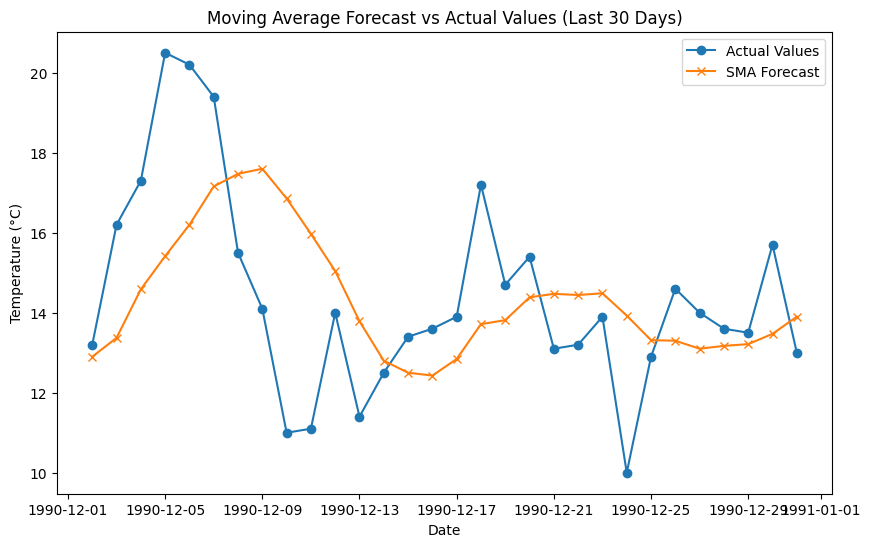

In [ ]:
# Plot the actual values and the forecast
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o')
plt.plot(predicted_values, label='SMA Forecast', marker='x')
plt.title(f'Moving Average Forecast vs Actual Values (Last {evaluation_period} Days)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


### **Exercice 4** : Time Series Clustering and Dendrogram Visualization

In [ ]:
!pip install tslearn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean
from tslearn.metrics import dtw
from tslearn.clustering import TimeSeriesKMeans


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.4 MB/s eta 0:00:00


#### Generating Synthetic Time Series Data

We will create a set of synthetic time series for demonstration. These series will represent different patterns such as trends and periodic behaviors.


In [ ]:
# Generate synthetic time series
np.random.seed(42)
time = np.linspace(0, 1, 100)
series = [
    10 + 5 * np.sin(2 * np.pi * 3 * time) + np.random.normal(0, 0.5, 100),
    8 + 3 * np.sin(2 * np.pi * 2 * time) + np.random.normal(0, 0.5, 100),
    15 + 2 * np.cos(2 * np.pi * 5 * time) + np.random.normal(0, 0.5, 100),
    5 + 4 * time + np.random.normal(0, 0.3, 100),
    12 - 3 * time + np.random.normal(0, 0.3, 100),
]
labels = [f"Series {i+1}" for i in range(len(series))]

# Convert to a DataFrame
data = pd.DataFrame({labels[i]: series[i] for i in range(len(series))})


#### Plotting the Time Series

Let's visualize the synthetic time series to understand their individual patterns.


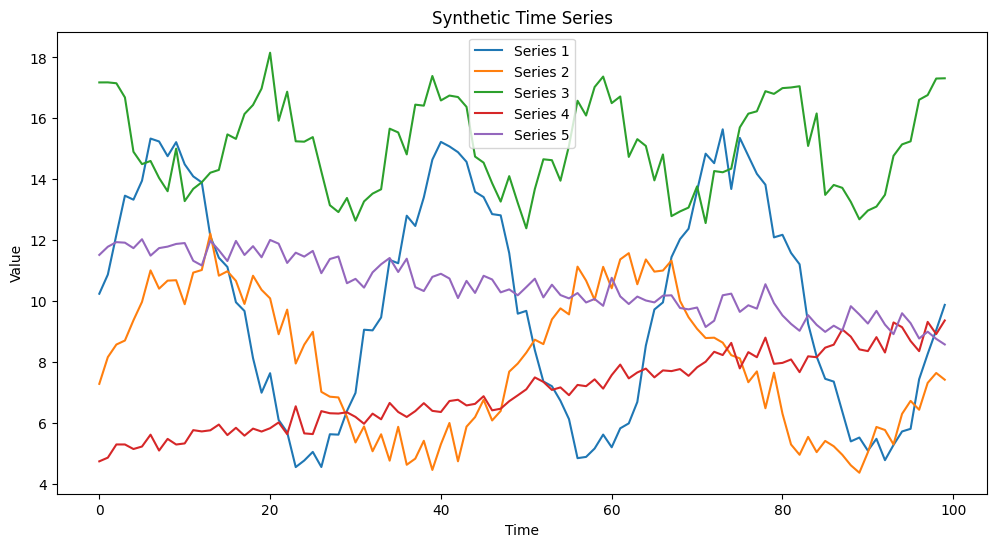

In [ ]:
# Plot the time series
plt.figure(figsize=(12, 6))
for i, label in enumerate(labels):
    plt.plot(data[label], label=label)
plt.title('Synthetic Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


#### Computing Pairwise Distances and Applying Hierarchical Clustering

We will compute pairwise distances between time series using Dynamic Time Warping (DTW) and apply hierarchical clustering to group similar series.


In [ ]:
# Compute pairwise DTW distances
from scipy.spatial.distance import squareform
n_series = len(series)
distance_matrix = np.zeros((n_series, n_series))

for i in range(n_series):
    for j in range(n_series):
        if i < j:
            distance_matrix[i, j] = dtw(series[i], series[j])
            distance_matrix[j, i] = distance_matrix[i, j]

# Perform hierarchical clustering
linked = linkage(squareform(distance_matrix), method='ward')


#### Visualizing the Dendrogram

The dendrogram illustrates the hierarchical clustering of the time series, showing their similarity.


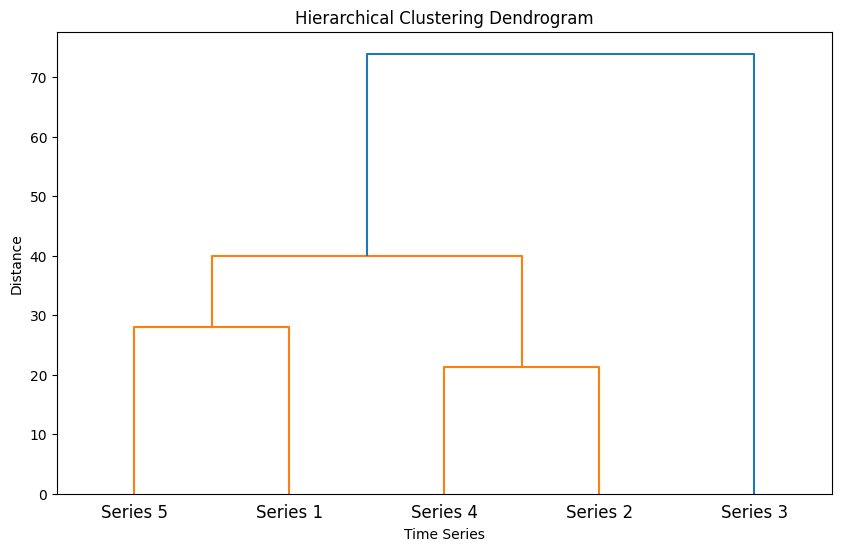

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=labels, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series')
plt.ylabel('Distance')
plt.show()


### **Exercice 5** : Time Series Classification Using UCR Archive Dataset

#### What is Time Series Classification?

Time series classification assigns a label to a time series based on its patterns or features.

Applications include:
- Detecting normal vs. abnormal ECG signals.
- Classifying human activities.
- Identifying machine faults.

In this exercise, we will classify ECG data into two categories: normal and abnormal heartbeats.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


#### Dataset: ECG200

The ECG200 dataset contains ECG (Electrocardiogram) readings classified into two categories: normal and abnormal heartbeats.

We will download the dataset directly from the UCR archive.


In [ ]:
# Load the ECG200 dataset from the provided links
url_train = "https://raw.githubusercontent.com/Shuchismita-Biswas/AML_Project_Fall19/refs/heads/master/ECG200_TRAIN.tsv"
url_test = "https://raw.githubusercontent.com/Shuchismita-Biswas/AML_Project_Fall19/refs/heads/master/ECG200_TEST.tsv"

# Read the train and test datasets
train_data = pd.read_csv(url_train, sep='\t', header=None)
test_data = pd.read_csv(url_test, sep='\t', header=None)

# Separate features and labels
X_train = train_data.iloc[:, 1:].values  # Training time series
y_train = train_data.iloc[:, 0].values  # Training labels
X_test = test_data.iloc[:, 1:].values   # Testing time series
y_test = test_data.iloc[:, 0].values    # Testing labels


#### Plotting Time Series Examples

Let's visualize a few time series from each class to understand their patterns.


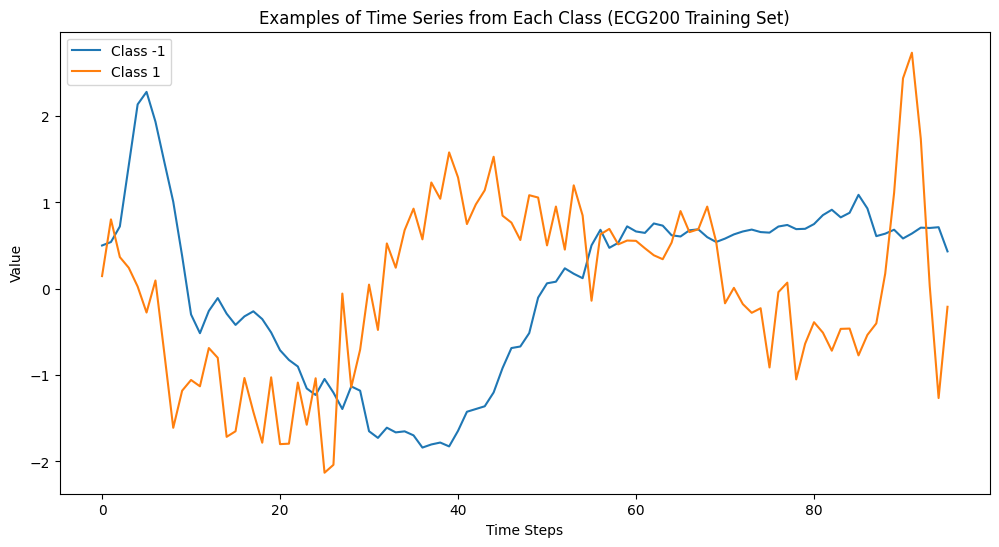

In [ ]:
# Plot examples of each class from the training set
plt.figure(figsize=(12, 6))

for label in np.unique(y_train):
    plt.plot(X_train[y_train == label][0], label=f'Class {int(label)}')
plt.title('Examples of Time Series from Each Class (ECG200 Training Set)')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


#### Classifying Time Series Using k-Nearest Neighbors (k-NN)

We will train a k-NN classifier on the training dataset and predict the classes of the test dataset.


In [ ]:
# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)


#### Evaluating Classification Performance

We will evaluate the model using metrics such as accuracy, precision, recall, and F1-score.


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.81      0.85        36
           1       0.90      0.95      0.92        64

    accuracy                           0.90       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.90      0.90      0.90       100

Confusion Matrix:
[[29  7]
 [ 3 61]]


### To go further, you could explore:

1. **Anomaly Detection**
   - Detect unusual patterns or rare events in time series, such as equipment failure, fraud detection, or medical anomalies.
   - Example application: Identify abnormal heartbeats in ECG data.

2. **Extrinsic Regression**
   - Predict a continuous value related to a time series, such as temperature, age, or sales volume.
   - Example application: Estimate a person's age based on gait patterns.

3. **Time Series Forecasting**
   - Predict future values of a time series, such as stock prices, weather, or power consumption.
   - Example techniques: ARIMA, LSTM, or Prophet.

4. **Time Series Clustering**
   - Group similar time series based on their patterns or trends.
   - Example application: Cluster customers' purchasing behaviors over time.

5. **Dimensionality Reduction**
   - Reduce the complexity of time series data for visualization or preprocessing.
   - Techniques to explore: Principal Component Analysis (PCA), Symbolic Aggregate Approximation (SAX).

6. **Time Series Classification with Advanced Techniques**
   - Use dynamic time warping (DTW) or convolutional neural networks (CNN) for classification tasks.
   - Example application: Activity recognition (e.g., walking vs. running).

7. **Handling Missing Data**
   - Impute missing values in time series using statistical or machine learning approaches.
   - Example techniques: Mean/median imputation, forward/backward filling, or interpolation.

8. **Unequal Length Time Series**
   - Analyze or align time series with varying lengths using techniques like padding, truncation, or dynamic time warping (DTW).
   - Example application: Align patient health records of differing durations.

9. **Feature Extraction**
   - Extract meaningful features from time series data for downstream tasks.
   - Techniques to explore: catch22, Fourier Transform, wavelet transform.

10. **Multi-variate Time Series Analysis**
    - Analyze time series with multiple variables to capture interdependencies.
    - Example application: Weather forecasting using temperature, humidity, and wind speed data.
